## Import required packages and setup
Before we begin our analysis, we import some required packages

In [9]:
#import packages (required for analysis)
from sqlalchemy import create_engine, MetaData, Table
import json


# setup some of the figure aesthetics to make it look prettier


## Setup experiment paths
Next, we set some useful parameters to tell pandas where our data and required files are located.

In [2]:
#params (change these for every experiment)
DATA_PATH = '/Users/kathrynschuler/Documents/current/research/raw-data/'
exp_id = '0165'
exp_title = 'empiricalYang-36Noun-HFrule-easy4-mturk'


In [3]:
## The db_url has to look like this. you get the particiant.db from the server location of the experiment by
## using the command :
## scp -r -P 8008 kschuler@104.131.28.137:path/to/exp/file.db $HOME/Path/to/raw-data
db_url = "sqlite:///"+DATA_PATH+exp_id+"-"+exp_title+"-data/participants.db"
## table name set in config.txt of experiment file
table_name = '0165'
## data_column_name set automatically by psiturk
data_column_name = 'datastring'

print db_url

sqlite:////Users/kathrynschuler/Documents/current/research/raw-data/0165-empiricalYang-36Noun-HFrule-easy4-mturk-data/participants.db


In [4]:
# boilerplace sqlalchemy setup
engine = create_engine(db_url)
metadata = MetaData()
metadata.bind = engine
table = Table(table_name, metadata, autoload=True)

In [5]:
# make a query and loop through
s = table.select()
rows = s.execute()

data = []
#status codes of subjects who completed experiment
statuses = [3, 4, 5, 7]
# if you have workers you wish to exclude, add them here
exclude = ['A35YZM09QR7IZG:31T4R4OBOSH1FCCIYPT45L0HETLC7K']
for row in rows:
    # only use subjects who completed experiment and aren't excluded
    if row['status'] in statuses and row['uniqueid'] not in exclude:
        data.append(row[data_column_name])

In [6]:
# Now we have all participant datastrings in a list.
# Let's make it a bit easier to work with:

# parse each participant's datastring as json object
# and take the 'data' sub-object
data = [json.loads(part)['data'] for part in data]

# insert uniqueid field into trialdata in case it wasn't added
# in experiment:
for part in data:
    for record in part:
        record['trialdata']['uniqueid'] = record['uniqueid']

# flatten nested list so we just have a list of the trialdata recorded
# each time psiturk.recordTrialData(trialdata) was called.
data = [record['trialdata'] for part in data for record in part]

# Put all subjects' trial data into a dataframe object from the
# 'pandas' python library: one option among many for analysis
data_frame = pd.DataFrame(data)



In [7]:
# get all of the unique subject IDs, then check subject tracking to make sure they match
print data_frame.head()

               action case condition correct counterbalance  det detnum error  \
0               Begin  NaN       NaN     NaN            NaN  NaN    NaN   NaN   
1            NextPage  NaN       NaN     NaN            NaN  NaN    NaN   NaN   
2            NextPage  NaN       NaN     NaN            NaN  NaN    NaN   NaN   
3            NextPage  NaN       NaN     NaN            NaN  NaN    NaN   NaN   
4  FinishInstructions  NaN       NaN     NaN            NaN  NaN    NaN   NaN   

   indexOf   n    ...                                             templates  \
0      NaN NaN    ...     [instructions/instruct-1.html, instructions/in...   
1        0 NaN    ...                                                   NaN   
2        1 NaN    ...                                                   NaN   
3        2 NaN    ...                                                   NaN   
4        3 NaN    ...                                                   NaN   

  test_number type type-full          

In [8]:
#load subject tracking sheet
#tracking_sheet = DATA_PATH+'subject-tracking/'+exp_id+'-'+exp_title+'-track.csv'
#subj_track = pd.read_csv(tracking_sheet)

#merge subject tracking with data
#data_frame = pd.merge(data_frame, subj_track, on='uniqueid')

#summary_data = data_frame.groupby(['condition', 'counterbalance', 'phase','uniqueid' ], as_index=False)['n'].count()
#g = sns.FacetGrid(data_frame, row="whichLang", col="whichCond", margin_titles=True)
#g.map(sns.regplot, "phase", "uniqueid", color=".3", fit_reg=False, x_jitter=.1);
#summary_data.pivot(columns="phase", value="n")

In [9]:
# isolate the instruction sections
data_instructions = data_frame[data_frame.phase == 'INSTRUCTIONS']
data_instructions = data_instructions[['action', 'phase', 'template', 'uniqueid', 'viewTime']]

# isolate the exposure phase
data_production = data_frame[data_frame.phase == 'production']
data_production = data_production[['phase', 'uniqueid', 'condition', 'counterbalance', 'n', 'verb', 'noun', 'det', 'test_number', 'type','user_input']]
data_production = data_production.dropna()

# isolate the rating phase
data_rating = data_frame[data_frame.phase == 'rating']
#data_rating = data_rating.rename(columns={'cat': 'type-full'})
data_rating = data_rating[['phase', 'uniqueid', 'condition', 'counterbalance','n', 'verb', 'noun', 'det', 'number', 'type', 'error','user_input']]
data_rating = data_rating.dropna()

# merge these two together
prod_and_rate = data_frame.query('phase in ["production", "rating"]' )
prod_and_rate = prod_and_rate[['condition', 'counterbalance', 'det', 'n', 'noun', 'phase', 'number', 'type', 'uniqueid', 'verb', 'user_input']]
prod_and_rate = prod_and_rate.dropna()


In [10]:
# summary_data = prod_and_rate.groupby(['condition', 'counterbalance', 'phase','uniqueid'], as_index = False)['uniqueid'].count()
# #g = sns.FacetGrid(summary_data, row="condition", col="counterbalance", margin_titles=True)
# #g.map(sns.regplot, "phase", "uniqueid", color=".3", fit_reg=False, x_jitter=.1);
# #summary_data.pivot(columns="phase", value="n")
# print summary_data
print data_rating

       phase                                       uniqueid condition  \
214   rating  A2541C8MY0BYV3:39ZSFO5CA8XQL1UKLP312HRZXIRUJX         1   
215   rating  A2541C8MY0BYV3:39ZSFO5CA8XQL1UKLP312HRZXIRUJX         1   
216   rating  A2541C8MY0BYV3:39ZSFO5CA8XQL1UKLP312HRZXIRUJX         1   
217   rating  A2541C8MY0BYV3:39ZSFO5CA8XQL1UKLP312HRZXIRUJX         1   
218   rating  A2541C8MY0BYV3:39ZSFO5CA8XQL1UKLP312HRZXIRUJX         1   
219   rating  A2541C8MY0BYV3:39ZSFO5CA8XQL1UKLP312HRZXIRUJX         1   
220   rating  A2541C8MY0BYV3:39ZSFO5CA8XQL1UKLP312HRZXIRUJX         1   
221   rating  A2541C8MY0BYV3:39ZSFO5CA8XQL1UKLP312HRZXIRUJX         1   
222   rating  A2541C8MY0BYV3:39ZSFO5CA8XQL1UKLP312HRZXIRUJX         1   
223   rating  A2541C8MY0BYV3:39ZSFO5CA8XQL1UKLP312HRZXIRUJX         1   
224   rating  A2541C8MY0BYV3:39ZSFO5CA8XQL1UKLP312HRZXIRUJX         1   
225   rating  A2541C8MY0BYV3:39ZSFO5CA8XQL1UKLP312HRZXIRUJX         1   
226   rating  A2541C8MY0BYV3:39ZSFO5CA8XQL1UKLP312H

In [11]:
#make sure every subject does all 18 of the ratings.
data_rating.uniqueid.value_counts()

A3CIUPLZ6614U2:34S6N1K2ZVKRB5C0OB8FZHF197GLHT    36
A1A3YOE4YCYM4E:34X6J5FLPTZYT8N34GJWSGUAV42JQD    36
A2DWPP1KKAY0HG:3XLBSAQ9Z4DEN5NSQ3DCGJ159CMZ7F    36
A1O81SOPKHK5RZ:3WSELTNVR330KVCRRE0E4M2EQT5TAU    36
A3MEXVF979S444:3C2NJ6JBKAIDKFC3H3LNP5DONBDN2C    36
A2RVEG53L48BAE:3A0EX8ZRN8P1KRGD7YN97EEZN8VYBW    36
A1XUZFDVKP95VC:35H6S234SA1XCRPY0514L1UEDYS565    36
A1219SY7CR1UWP:3YW4XOSQKQMJQKEGV0XVYHVD487U1O    36
AGDFBU9CK6Z9R:3ATTHHXXWAPM7U498CTOANB3GSLIXJ     36
A1YM0IWPC72J7V:3IQ1VMJRYTLH0G3DT8VXDM12WHQ9AO    36
A289D98Z4GAZ28:3WYP994K17SVEFZIB761WYS79BQ6YX    36
AU849EHZNGV2Z:3HHRAGRYX8662KXE3R0FEHL7LYTO91     36
AAM0Q3DCSSQ0A:3JZQSN0I3QBRBH7TIUNZJ4YGXAXGFY     36
A36470UBRH28GO:3II4UPYCOJ8LQMNBUKXLPIZXQFEQD5    36
A32QJF67JMJFKX:3MD9PLUKKIF3QQFF6AU1CGNV8KBZNV    36
AK8ONB60Q4RJ5:3GGAI1SQEVZK0FJ52VVTO3XAUCFMCJ     36
A6HR4PTSCMZ4L:3LBXNTKX0RWTWTB64INBXUC0W2DX9T     36
A1A3TGZ7DKJWRW:3GGAI1SQEVZK0FJ52VVTO3XAWJHMC1    36
A1CE2XPYCDRHVZ:358UUM7WRZ45LE11GMJZUGZ61VPR71    36
A1K75ALN5NQI

In [12]:
# get what noun and determiner they said
print data_production['user_input'].head()

splits = data_production['user_input'].str.split()
data_production['det_prod'] = splits.str[2]
data_production['noun-prod'] = splits.str[1]


data_rating.to_csv("/Users/kathrynschuler/Desktop/rating.csv")
data_production.to_csv("/Users/kathrynschuler/Desktop/production.csv")

200     gentif daggin ka
201    gentif bleggin ka
202        gentif sep mo
203       gentif norg ka
204       gentif norg pa
Name: user_input, dtype: object


In [16]:
# let's only care about Ka and Po for today
ka_po_production = data_production.query('det_prod in ["Ka", "ka", "Ka.", "ka."]')


# out of 16 trials, how many of them are ka/po for each subject - let's look at each subject
prod_subj = ka_po_production.groupby(['uniqueid'], sort=True)['det_prod'].sum()
prod_subj2 = data_production.groupby(['uniqueid'], sort=True)['det_prod'].apply(lambda x: "{%s}" % ', '.join(x))
print prod_subj2

TypeError: sequence item 3: expected string or Unicode, float found

In [13]:
%load_ext rmagic
%R -i prod_and_rate

    

/Users/kathrynschuler/anaconda/lib/python2.7/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [14]:
%%R

summary(prod_and_rate)
head(prod_and_rate)

    condition counterbalance  det n   noun      phase number  type
192         1              0 null 1   norg production      1 novel
193         1              0 null 2   geed production      1 novel
194         1              0 null 3 flugit production      1 novel
195         1              0 null 4   geed production      1 novel
196         1              0 null 5    sep production      1 novel
197         1              0 null 6   norg production      1 novel
                   uniqueid   verb       user_input
192 debugKEHD9Q:debug45SXLV gentif   gentif norg ka
193 debugKEHD9Q:debug45SXLV gentif   gentif geed ka
194 debugKEHD9Q:debug45SXLV gentif gentif flugit ka
195 debugKEHD9Q:debug45SXLV gentif   gentif geed ka
196 debugKEHD9Q:debug45SXLV gentif  gentif sep null
197 debugKEHD9Q:debug45SXLV gentif gentif norg null


In [ ]:
%R install.packages('reshape')


In [ ]:
%%R
library(reshape)
cast(prod_and_rate, uniqueid ~ phase)

In [ ]:
%R -i data_rating

In [ ]:
%R -i data_production

In [ ]:
%%R

summary(data_rating)

In [ ]:
%%R
library(plyr)
library(ggplot2)
install.packages('doBy')

In [ ]:
%%R
levels(data_rating$condition) <- c("5 Rule | 4 Exception", "3 Rule | 6 Exception")
levels(data_production$condition) <- c("5 Rule | 4 Exception", "3 Rule | 6 Exception")
print(data_rating)
#rename(data_rating, c("type.full"="cat"))

In [ ]:
%%R
# With a data set with NA's, use na.rm=TRUE
## Summarizes data.
## Gives count, mean, standard deviation, standard error of the mean, and confidence 
## interval (default 95%).
##   data: a data frame.
##   measurevar: the name of a column that contains the variable to be summariezed
##   groupvars: a vector containing names of columns that contain grouping variables
##   na.rm: a boolean that indicates whether to ignore NA's
##   conf.interval: the percent range of the confidence interval (default is 95%)
summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=FALSE, conf.interval=.95) {
    library(doBy)

    # New version of length which can handle NA's: if na.rm==T, don't count them
    length2 <- function (x, na.rm=FALSE) {
        if (na.rm) sum(!is.na(x))
        else       length(x)
    }

    # Collapse the data
    formula <- as.formula(paste(measurevar, paste(groupvars, collapse=" + "), sep=" ~ "))
    datac <- summaryBy(formula, data=data, FUN=c(length2,mean,sd), na.rm=na.rm)

    # Rename columns
    names(datac)[ names(datac) == paste(measurevar, ".mean",    sep="") ] <- measurevar
    names(datac)[ names(datac) == paste(measurevar, ".sd",      sep="") ] <- "sd"
    names(datac)[ names(datac) == paste(measurevar, ".length2", sep="") ] <- "N"
    
    datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean
    
    # Confidence interval multiplier for standard error
    # Calculate t-statistic for confidence interval: 
    # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
    ciMult <- qt(conf.interval/2 + .5, datac$N-1)
    datac$ci <- datac$se * ciMult
    
    return(datac)
}
det <- c('ka', 'po', 'lee','bae', 'tay', 'muy', 'woo')
detcat <- c('ka', 'non-ka', 'non-ka', 'non-ka', 'non-ka', 'non-ka', 'non-ka')

df <- data.frame(det, detcat)
dr <- merge(data_rating, df, by="det")

        
sum_data_rating = summarySE(dr, measurevar="user_input", groupvars=c("condition", "error","detcat"), na.rm=TRUE)
print(sum_data_rating)

In [ ]:
%%R
#print(sum_data_rating)
# Use dose as a factor rather than numeric
#dr <- sum_data_rating
sum_data_rating$condition <- factor(sum_data_rating$condition)

# Error bars represent standard error of the mean
g = ggplot(sum_data_rating, aes(x=error, y=user_input, fill=detcat)) + 
    geom_bar(position=position_dodge(), stat="identity", colour="black") +theme_classic()+ coord_cartesian(ylim=c(1.0,5.0)) + 
    facet_grid(~ condition) + scale_fill_manual(values=c("#111111", "#999999"))+ylab("Rating")+xlab("")

g = g + theme(axis.ticks=element_blank(), legend.title=element_blank(), legend.background = element_rect(colour="#111111",size=0.25), legend.position=c(0.1,0.925))

g +geom_errorbar(aes(ymin=user_input-se, ymax=user_input+se), width=.2, position=position_dodge(.9))

In [ ]:
%%R



In [ ]:
%%R
ggsave("0153-rating.png")

In [ ]:
%%R
head(data_production)
det_prod <- unique(data_production$det_prod)
print(det_prod)

In [29]:
%%R
users_answer_cat = c('ka', 'other', 'ka', 'other', 'other', 'other', 'other', 'other', 'other', 'non-ka', 'non-ka', 'non-ka',
                    'other', 'non-ka', 'other', 'other', 'other', 'other','other', 'non-ka', 'other', 'other', 'other', 'other',
                    'other', 'other', 'other', 'other', 'other')
ans_dict <- data.frame(det_prod, users_answer_cat)
dp <- merge(data_production, ans_dict, on=det_prod)

In [30]:
%%R
head(dp)

  det_prod      phase                                      uniqueid
1      bae production A1M03U3W99BGZ4:36W0OB37HWFBGUT43CZO7WQW334HZ7
2       bo production A1VNYP58BTF4HX:3TXWC2NHNZRL0CP7A8HOYMV5XBWS9N
3       bo production A1VNYP58BTF4HX:3TXWC2NHNZRL0CP7A8HOYMV5XBWS9N
4       bo production A1VNYP58BTF4HX:3TXWC2NHNZRL0CP7A8HOYMV5XBWS9N
5     bok. production A1M03U3W99BGZ4:36W0OB37HWFBGUT43CZO7WQW334HZ7
6     bok. production A1M03U3W99BGZ4:36W0OB37HWFBGUT43CZO7WQW334HZ7
             condition counterbalance n   verb   noun  det test_number  type
1 3 Rule | 6 Exception              0 2 gentif flugit null           5 novel
2 5 Rule | 4 Exception              0 8 gentif flugit null           3 novel
3 5 Rule | 4 Exception              0 7 gentif daffin null           5 novel
4 5 Rule | 4 Exception              0 6 gentif   norg null           5 novel
5 3 Rule | 6 Exception              0 5 gentif    sep null           5 novel
6 3 Rule | 6 Exception              0 6 gentif    sep null    

In [31]:
%%R
thistab <- table(dp$uniqueid, dp$users_answer_cat, dp$noun)
with(dp, table(uniqueid, users_answer_cat)) -> gen.adm.table
thisdp <- prop.table(gen.adm.table, 1)*100
#print(gen.adm.table)
mdata <- melt(thisdp, id="uniqueid")
#print(mdata)


cdata <- cast(mdata, uniqueid~users_answer_cat)
print(cdata)


                                        uniqueid         ka    non-ka
1  A13VIJ7G997ZCY:3R2UR8A0IAHW3GFC676TUK7M7PKXOE  33.333333 58.333333
2  A18LPAFMK1B06K:3NJM2BJS4W7QLIGIUBNL57R2GCSCP8 100.000000  0.000000
3  A1M03U3W99BGZ4:36W0OB37HWFBGUT43CZO7WQW334HZ7   8.333333  8.333333
4  A1P3Z24Y6GRNVA:3WEV0KO0OMTX322OMOMQKIEVOWBSD4  50.000000  0.000000
5  A1VNYP58BTF4HX:3TXWC2NHNZRL0CP7A8HOYMV5XBWS9N  33.333333  0.000000
6  A280RC0S51YKFT:3VBEN272MK00FMCFOENYQ3HS1ORSGE   8.333333 66.666667
7  A2L772YDACSPHF:34J10VATJFZ2YX3XMYYWGFF7YDZIQ8   0.000000  0.000000
8  A2R40R4O6G0YBY:3HYA4D452RK1WNZMJF2AH04C2FT2FN 100.000000  0.000000
9  A2VD133723IZR8:36NEMU28XFETEDPAJMVU0X4A3NZMWV  58.333333 41.666667
10 A36SM7QM8OK3H6:37M28K1J0QE66SGMFKMA2GF27A2AJ5  50.000000 50.000000
11 A37I58C4258IPX:3PZDLQMM0TMUTBFCSDC99UJ95212CC 100.000000  0.000000
12 A3BFXVLAJK3SH9:3IO1LGZLK9YGZ980Y387XL42VGI86T  41.666667 58.333333
13 A3URNV625JS985:3C5W7UE9CFR83DU0TRRG2GIHCP5XMZ  91.666667  8.333333
14  AGMSPB6VYCCFK:3D

In [45]:
%%R

newdf <- read.csv("/Users/kathrynschuler/Desktop/0153-for-graphs.csv")
#qplot(newdf$noun, newdf$count, xlab="noun (ranked)", ylab="count") + theme_classic()
# hist(x = newdf$noun,
#     xlab = "Noun (Ranked)", ylab = "Frequency",
#     main = "Ranked frequency of nouns in exposure corpus")
levels(newdf$Condition) <- c("5 Rule | 4 Exception", "3 Rule | 6 Exception")
head(newdf)


  Condition Count UniqueKey Image     Case Noun Inflect Type
1         0     1      N1-1     1 singular   N1    null   ka
2         0     2      N1-2     1 singular   N1    null   ka
3         0     3      N1-3     1 singular   N1    null   ka
4         0     4      N1-4     1 singular   N1    null   ka
5         0     5      N1-5     1 singular   N1    null   ka
6         0     6      N1-6     1 singular   N1    null   ka


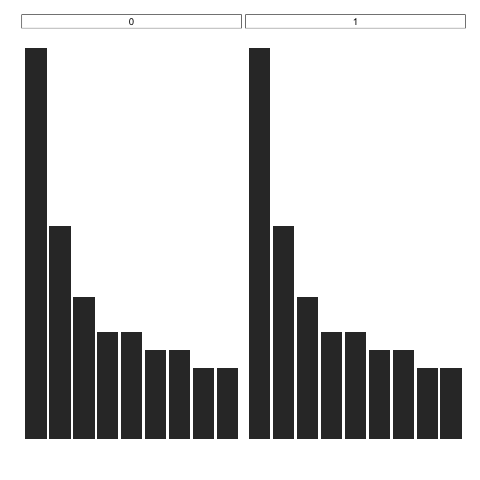

In [58]:
%%R
g <- ggplot(newdf, aes(x=Noun))
g + geom_histogram() + theme_classic() + labs(x="") + 
    facet_grid(~Condition)+theme(axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      legend.position="none")

In [61]:
%%R
ggsave("0156-rating.png", width = 12, height = 4 )

In [33]:
%%R

head(newdf)

Error in head(newdf) : object 'newdf' not found


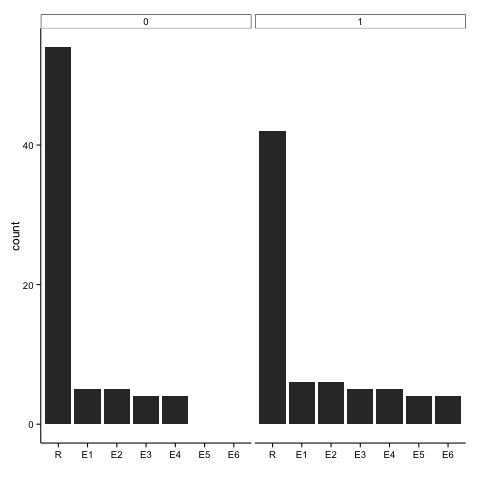

In [62]:
%%R

nnewdf <- subset(newdf, Inflect != 'null')
nnewdf$Inflect <- factor(nnewdf$Inflect, levels = c("R", "E1", "E2", "E3", "E4", "E5", "E6"))
head(newdf)

g <- ggplot(nnewdf, aes(x=Inflect))
g + geom_histogram() + theme_classic() + labs(x="")+facet_grid(~ Condition)


In [35]:
%%R
condition_map <- ddply(dp, .(condition, uniqueid), summarize, NumSubs = length(unique(uniqueid)))
newdp <- merge(mdata, condition_map, on="uniqueid")
sum_data_prod = summarySE(newdp, measurevar="value", groupvars=c("condition","users_answer_cat"), na.rm=TRUE)
print(sum_data_prod)

             condition users_answer_cat N    value       sd       se       ci
1 5 Rule | 4 Exception               ka 8 56.25000 40.02727 14.15178 33.46364
2 5 Rule | 4 Exception           non-ka 8 13.54167 24.37207  8.61683 20.37556
3 5 Rule | 4 Exception            other 8 30.20833 38.30162 13.54167 32.02095
4 3 Rule | 6 Exception               ka 7 53.57143 30.75333 11.62367 28.44208
5 3 Rule | 6 Exception           non-ka 7 30.95238 27.09478 10.24086 25.05849
6 3 Rule | 6 Exception            other 7 15.47619 30.59161 11.56254 28.29252


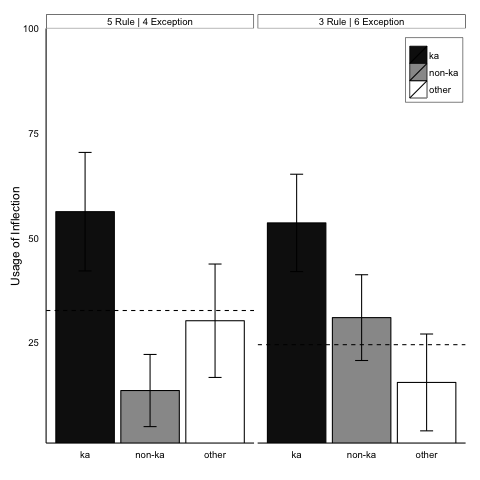

In [36]:
%%R
sum_data_prod$condition <- factor(sum_data_prod$condition)
dummy <- data.frame(condition = c("5 Rule | 4 Exception", "3 Rule | 6 Exception"), Z = c(32.65, 24.49))

# Error bars represent standard error of the mean
g = ggplot(sum_data_prod, aes(x=users_answer_cat, y=value, fill=users_answer_cat), colour="black") + 
    geom_bar(position=position_dodge(), stat="identity", colour="black") +theme_classic()+ coord_cartesian(ylim=c(1.0,100.0)) + 
    facet_grid(~ condition) +geom_hline(data = dummy, aes(yintercept = Z), linetype="dashed")+ scale_fill_manual(values=c("#111111", "#999999", "000000"))+
    ylab("Usage of Inflection")+xlab("")

g = g + theme(axis.ticks=element_blank(), legend.title=element_blank(), legend.background = element_rect(colour="#111111",size=0.25), legend.position=c(0.925,0.90))

g +geom_errorbar(aes(ymin=value-se, ymax=value+se), width=.2, position=position_dodge(.9))

In [37]:
%%R
ggsave("0153-production.png")

Saving 6.67 x 6.67 in image


In [38]:
%%R
subo <- subset(dp, users_answer_cat != 'other')
thistab <- table(subo$uniqueid, subo$users_answer_cat, subo$noun)
with(subo, table(uniqueid, users_answer_cat)) -> gen.adm.table
thisdp <- prop.table(gen.adm.table, 1)*100
#print(gen.adm.table)
mdata <- melt(thisdp, id="uniqueid")
#print(mdata)


cdata <- cast(mdata, uniqueid~users_answer_cat)
print(cdata)

                                        uniqueid        ka    non-ka other
1  A13VIJ7G997ZCY:3R2UR8A0IAHW3GFC676TUK7M7PKXOE  36.36364 63.636364     0
2  A18LPAFMK1B06K:3NJM2BJS4W7QLIGIUBNL57R2GCSCP8 100.00000  0.000000     0
3  A1M03U3W99BGZ4:36W0OB37HWFBGUT43CZO7WQW334HZ7  50.00000 50.000000     0
4  A1P3Z24Y6GRNVA:3WEV0KO0OMTX322OMOMQKIEVOWBSD4 100.00000  0.000000     0
5  A1VNYP58BTF4HX:3TXWC2NHNZRL0CP7A8HOYMV5XBWS9N 100.00000  0.000000     0
6  A280RC0S51YKFT:3VBEN272MK00FMCFOENYQ3HS1ORSGE  11.11111 88.888889     0
7  A2L772YDACSPHF:34J10VATJFZ2YX3XMYYWGFF7YDZIQ8        NA        NA    NA
8  A2R40R4O6G0YBY:3HYA4D452RK1WNZMJF2AH04C2FT2FN 100.00000  0.000000     0
9  A2VD133723IZR8:36NEMU28XFETEDPAJMVU0X4A3NZMWV  58.33333 41.666667     0
10 A36SM7QM8OK3H6:37M28K1J0QE66SGMFKMA2GF27A2AJ5  50.00000 50.000000     0
11 A37I58C4258IPX:3PZDLQMM0TMUTBFCSDC99UJ95212CC 100.00000  0.000000     0
12 A3BFXVLAJK3SH9:3IO1LGZLK9YGZ980Y387XL42VGI86T  41.66667 58.333333     0
13 A3URNV625JS985:3C5W7UE

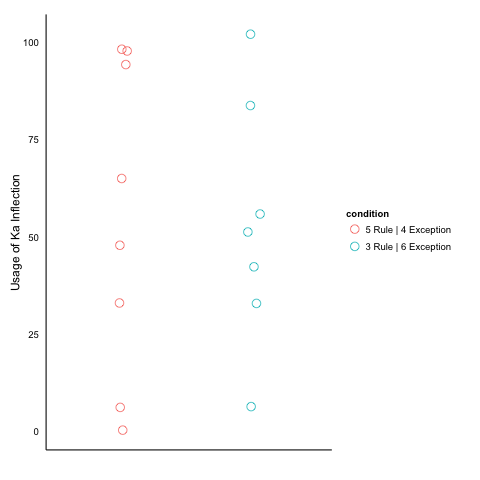

In [39]:
%%R
newdp2<- subset(newdp, users_answer_cat == 'ka')
sum_data_prod2 = summarySE(newdp2, measurevar="value", groupvars=c("condition","uniqueid","users_answer_cat"), na.rm=TRUE)
#dummy <- data.frame(condition = c("5 Rule | 4 Exception", "3 Rule | 6 Exception"), Z = c(75.0, 58.3))

# Error bars represent standard error of the mean
p = ggplot(sum_data_prod2, aes(x=condition, y=value)) + geom_point(shape = 1, position = position_jitter(width = .05), size=4, aes(color = condition)) 

# +theme_classic()+ coord_cartesian(ylim=c(1.0,100.0)) + 
#     facet_grid(~ condition) + 
#     ylab("Usage of Inflection")+xlab("")
p +theme_classic()+ theme(axis.ticks=element_blank(), axis.text.x = element_blank())+xlab("")+ylab("Usage of Ka Inflection")



In [40]:
%%R
condition_map <- ddply(dp, .(condition, uniqueid), summarize, NumSubs = length(unique(uniqueid)))
newdp <- merge(cdata, condition_map, on="uniqueid")
newdp <- rename(newdp, c("non-ka"="non.ka"))

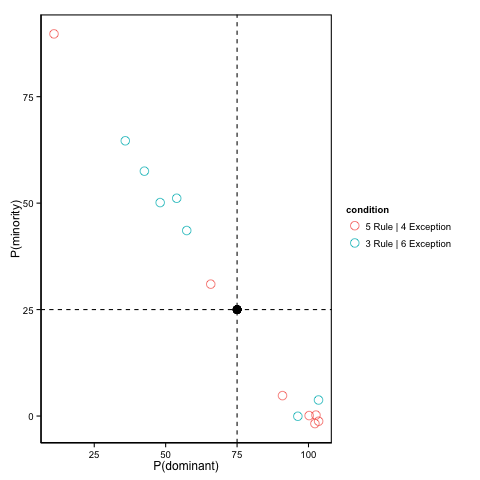

In [41]:
%%R
g = ggplot(newdp, aes(x=ka, y=non.ka)) + geom_point(shape = 1, position = position_jitter(width = 4, height=4), size=4, aes(color = condition)) + theme_classic()+ylab("P(minority)")+xlab("P(dominant)")
g = g + geom_hline(aes(yintercept=25.0), linetype="dashed") + geom_vline(aes(xintercept=75.0), linetype="dashed")+ geom_point(aes(y=25, x=75), color="black", size=4) 
g + theme(panel.border = element_rect(fill=NA, linetype="solid", size=1))

In [42]:
%%R
sum_data_rating2 = summarySE(dr, measurevar="user_input", groupvars=c("uniqueid","type", "detcat"), na.rm=TRUE)
print(sum_data_rating2)

                                        uniqueid      type detcat N user_input
1  A13VIJ7G997ZCY:3R2UR8A0IAHW3GFC676TUK7M7PKXOE   correct     ka 4   3.000000
2  A13VIJ7G997ZCY:3R2UR8A0IAHW3GFC676TUK7M7PKXOE   correct non-ka 4   3.500000
3  A13VIJ7G997ZCY:3R2UR8A0IAHW3GFC676TUK7M7PKXOE incorrect     ka 2   3.500000
4  A13VIJ7G997ZCY:3R2UR8A0IAHW3GFC676TUK7M7PKXOE incorrect non-ka 6   4.000000
5  A18LPAFMK1B06K:3NJM2BJS4W7QLIGIUBNL57R2GCSCP8   correct     ka 4   2.000000
6  A18LPAFMK1B06K:3NJM2BJS4W7QLIGIUBNL57R2GCSCP8   correct non-ka 4   1.000000
7  A18LPAFMK1B06K:3NJM2BJS4W7QLIGIUBNL57R2GCSCP8 incorrect     ka 2   5.000000
8  A18LPAFMK1B06K:3NJM2BJS4W7QLIGIUBNL57R2GCSCP8 incorrect non-ka 6   3.000000
9  A1M03U3W99BGZ4:36W0OB37HWFBGUT43CZO7WQW334HZ7   correct     ka 4   5.000000
10 A1M03U3W99BGZ4:36W0OB37HWFBGUT43CZO7WQW334HZ7   correct non-ka 3   4.333333
11 A1M03U3W99BGZ4:36W0OB37HWFBGUT43CZO7WQW334HZ7 incorrect     ka 2   5.000000
12 A1M03U3W99BGZ4:36W0OB37HWFBGUT43CZO7WQW334HZ7 inc

In [43]:
%%R
print(newdp2)

                                        uniqueid users_answer_cat      value
1  A13VIJ7G997ZCY:3R2UR8A0IAHW3GFC676TUK7M7PKXOE               ka  33.333333
4  A18LPAFMK1B06K:3NJM2BJS4W7QLIGIUBNL57R2GCSCP8               ka 100.000000
8  A1M03U3W99BGZ4:36W0OB37HWFBGUT43CZO7WQW334HZ7               ka   8.333333
10 A1P3Z24Y6GRNVA:3WEV0KO0OMTX322OMOMQKIEVOWBSD4               ka  50.000000
14 A1VNYP58BTF4HX:3TXWC2NHNZRL0CP7A8HOYMV5XBWS9N               ka  33.333333
18 A280RC0S51YKFT:3VBEN272MK00FMCFOENYQ3HS1ORSGE               ka   8.333333
21 A2L772YDACSPHF:34J10VATJFZ2YX3XMYYWGFF7YDZIQ8               ka   0.000000
22 A2R40R4O6G0YBY:3HYA4D452RK1WNZMJF2AH04C2FT2FN               ka 100.000000
26 A2VD133723IZR8:36NEMU28XFETEDPAJMVU0X4A3NZMWV               ka  58.333333
30 A36SM7QM8OK3H6:37M28K1J0QE66SGMFKMA2GF27A2AJ5               ka  50.000000
33 A37I58C4258IPX:3PZDLQMM0TMUTBFCSDC99UJ95212CC               ka 100.000000
34 A3BFXVLAJK3SH9:3IO1LGZLK9YGZ980Y387XL42VGI86T               ka  41.666667